# Introduction to Subscription-Based Service Customer Churn Prediction

In the highly competitive landscape of subscription-based services, customer retention is essential for sustained success. Customer churn, where customers cancel their subscriptions, poses a significant challenge to businesses. This project focuses on leveraging machine learning to predict churn based on historical customer data, including demographics, usage behavior, and interaction patterns.

By analyzing patterns and trends from historical customer data, subscription-based businesses can identify the factors that most significantly influence customer decisions to leave. This predictive insight enables companies to implement targeted strategies to retain their customers, thereby enhancing customer satisfaction and loyalty.

In [1]:
# Importing Libraries
import warnings as wrn
wrn.filterwarnings('ignore', category=DeprecationWarning)
wrn.filterwarnings('ignore', category=FutureWarning)
wrn.filterwarnings('ignore', category=UserWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Reading data
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

# Data Preprocessing
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Splitting data into features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handling imbalanced data with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [3]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_classification_report = classification_report(y_test, y_pred_lr)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_classification_report = classification_report(y_test, y_pred_gb)

# XGBoost Classifier
xg = xgb.XGBClassifier(n_estimators=100, random_state=42)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
xg_accuracy = accuracy_score(y_test, y_pred_xg)
xg_classification_report = classification_report(y_test, y_pred_xg)

# LightGBM Classifier
lg = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)
lg_accuracy = accuracy_score(y_test, y_pred_lg)
lg_classification_report = classification_report(y_test, y_pred_lg)


[LightGBM] [Info] Number of positive: 6356, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1857
[LightGBM] [Info] Number of data points in the train set: 12712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


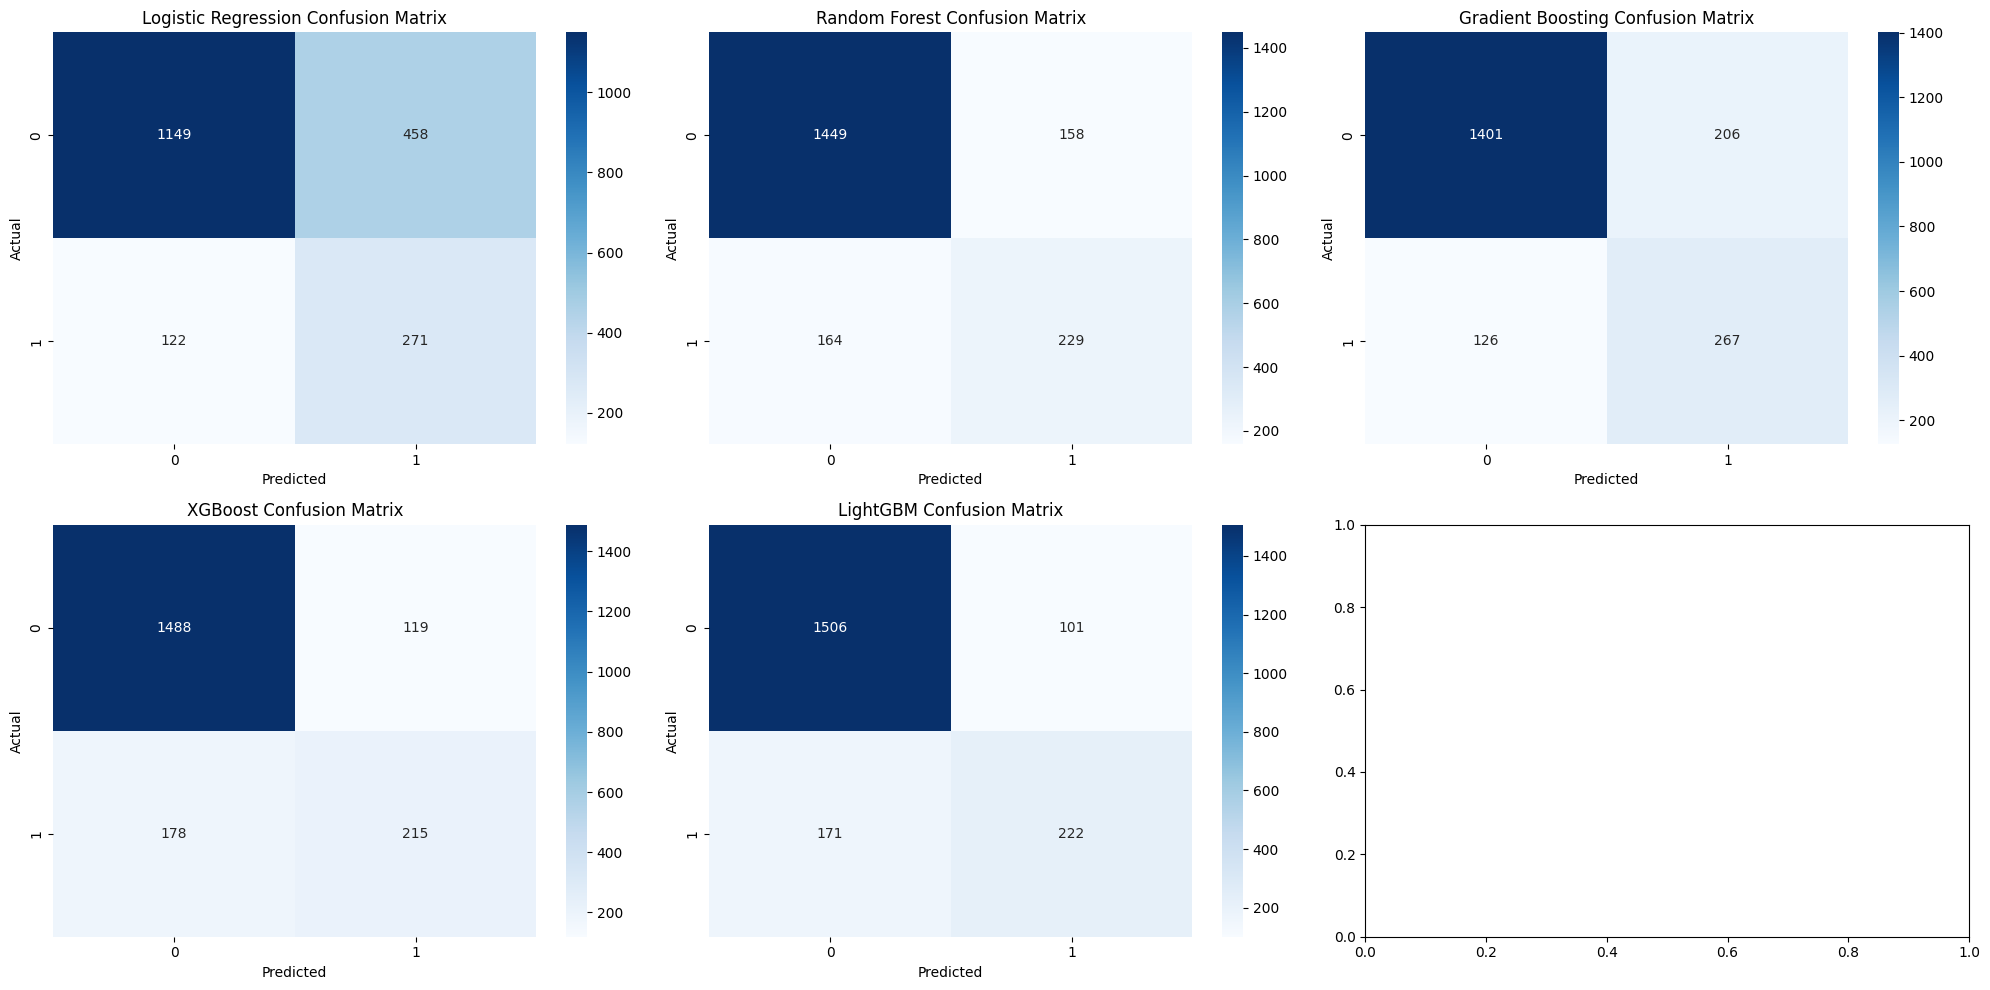

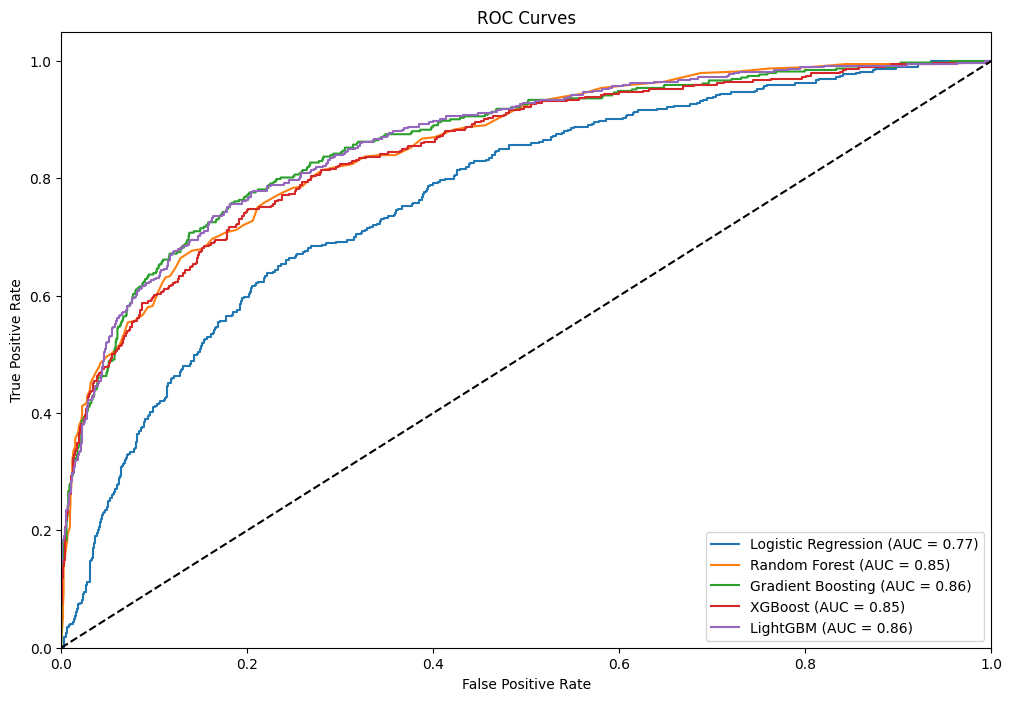

In [4]:
# Plotting confusion matrix for all models
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
models = [("Logistic Regression", lr, y_pred_lr),
          ("Random Forest", rf, y_pred_rf),
          ("Gradient Boosting", gb, y_pred_gb),
          ("XGBoost", xg, y_pred_xg),
          ("LightGBM", lg, y_pred_lg)]

for ax, (title, model, y_pred) in zip(axes.flatten(), models):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{title} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC curves for all models
plt.figure(figsize=(12, 8))
for name, model, y_pred in models:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


In [5]:
# Displaying classification reports and accuracy scores
model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM"]
reports = [lr_classification_report, rf_classification_report, gb_classification_report, xg_classification_report, lg_classification_report]
accuracies = [lr_accuracy, rf_accuracy, gb_accuracy, xg_accuracy, lg_accuracy]

for name, report, accuracy in zip(model_names, reports, accuracies):
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)
    print("\n")


--- Logistic Regression ---
Accuracy: 0.7100
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1607
           1       0.37      0.69      0.48       393

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.71      0.74      2000



--- Random Forest ---
Accuracy: 0.8390
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.59      0.58      0.59       393

    accuracy                           0.84      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.84      0.84      0.84      2000



--- Gradient Boosting ---
Accuracy: 0.8340
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1607
           1       0.56      0.68      0.62       393

    accuracy                           0.83      20

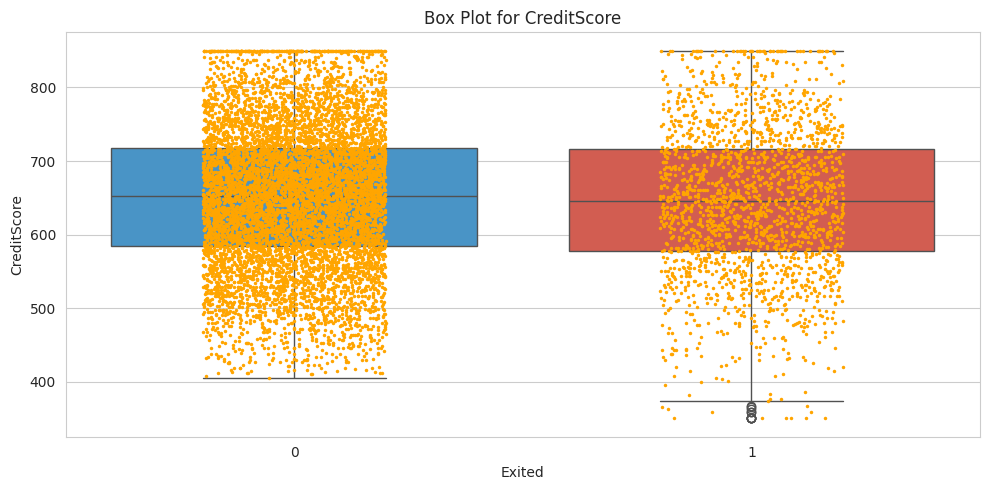

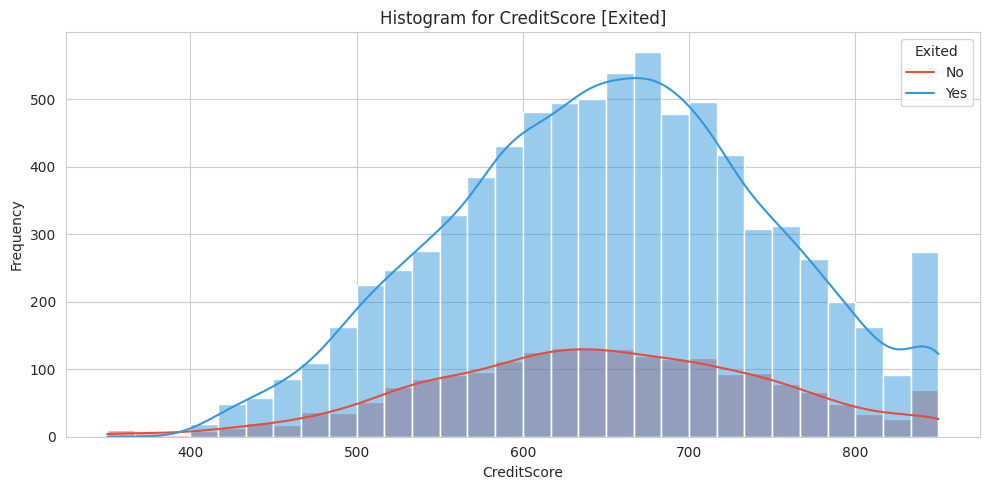

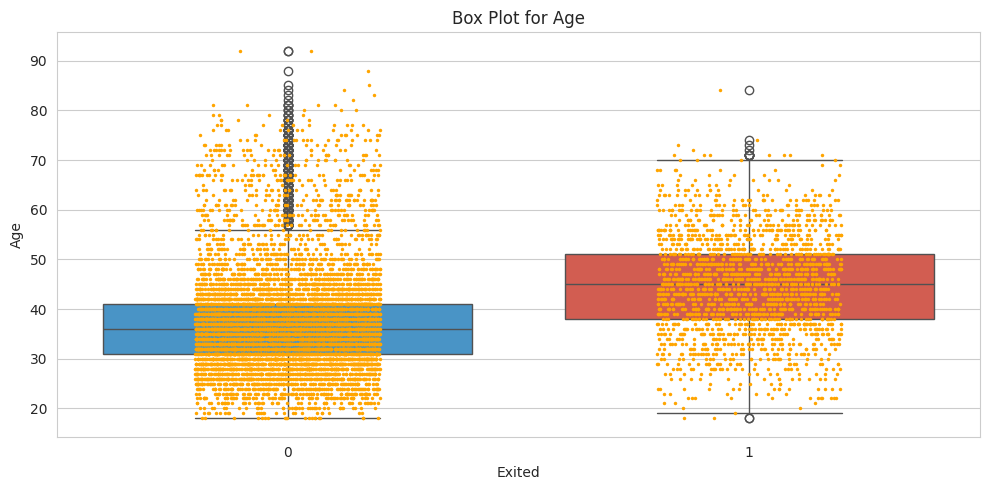

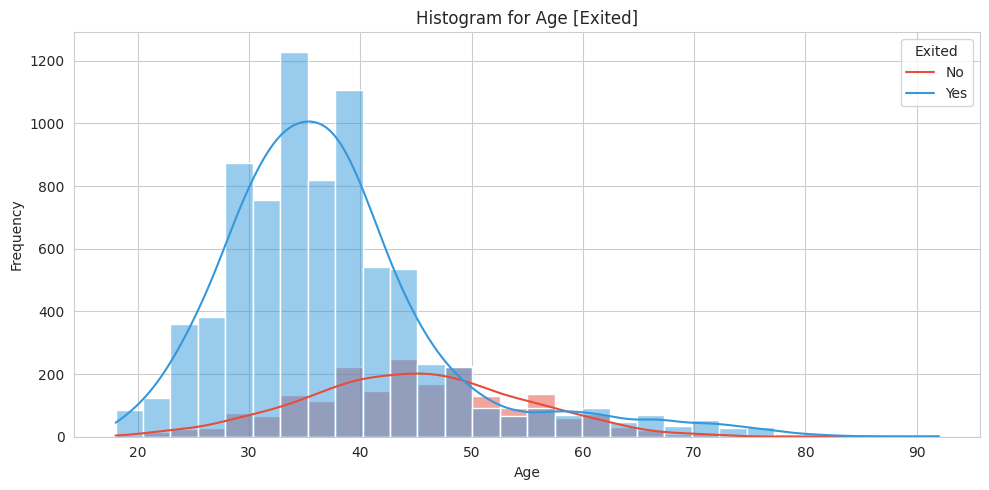

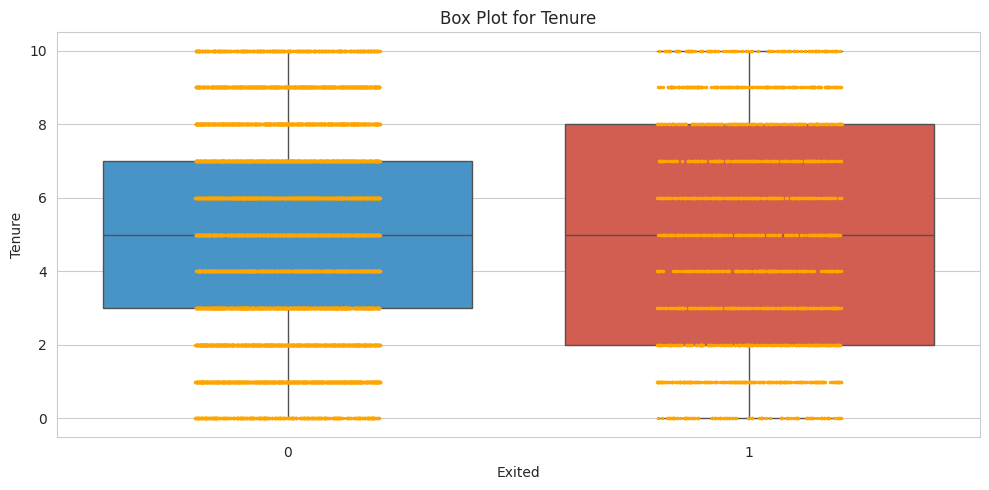

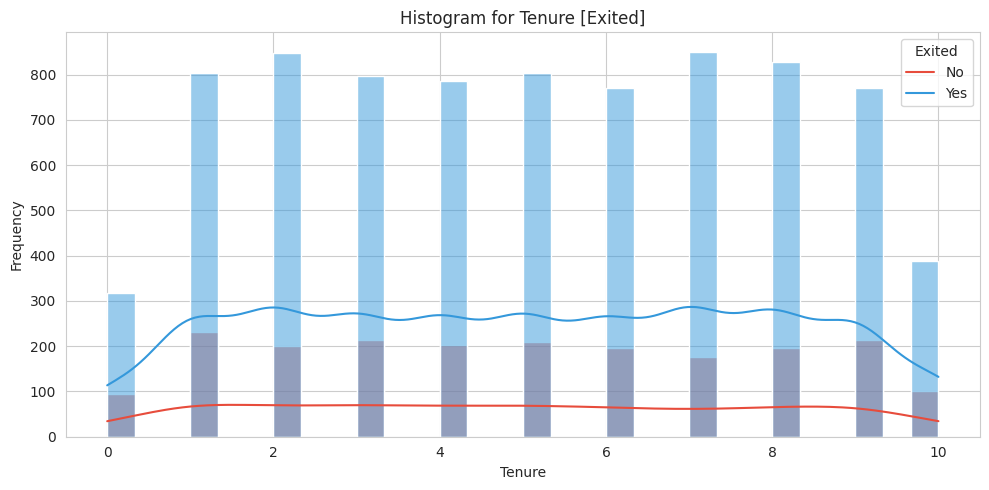

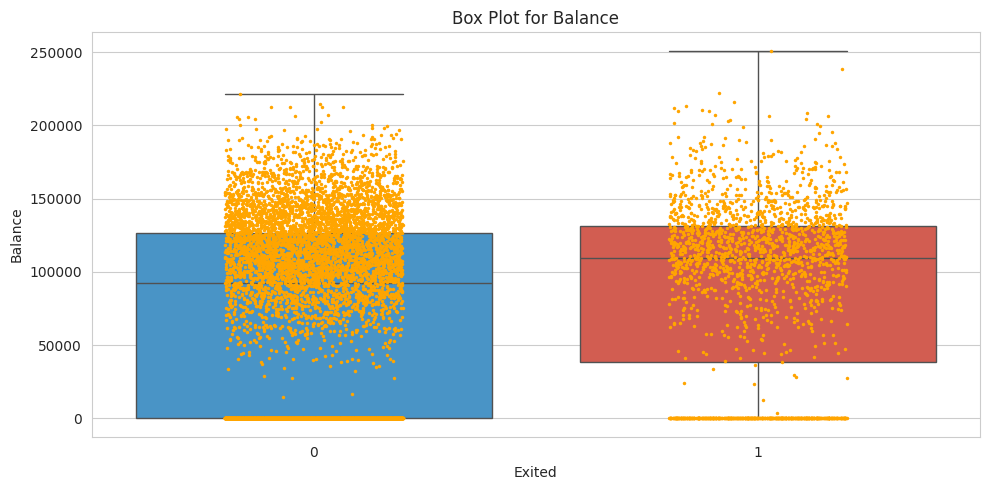

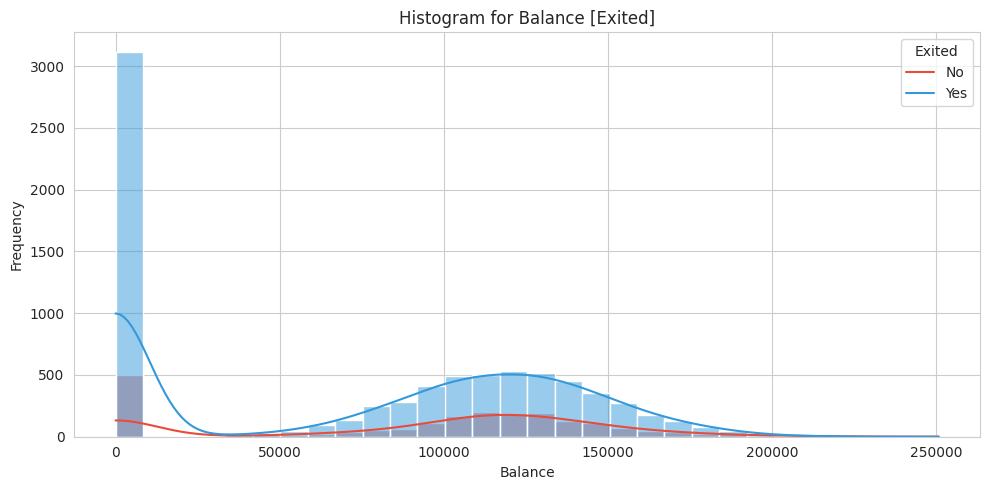

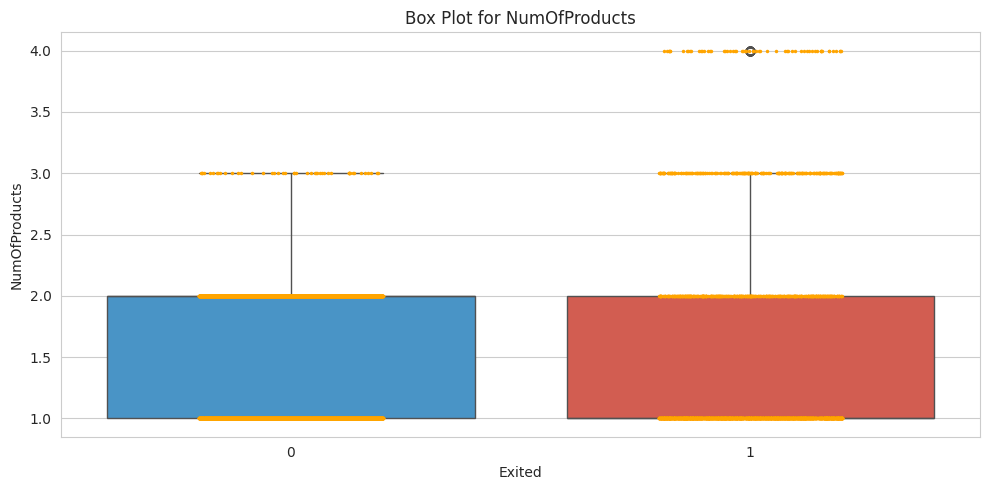

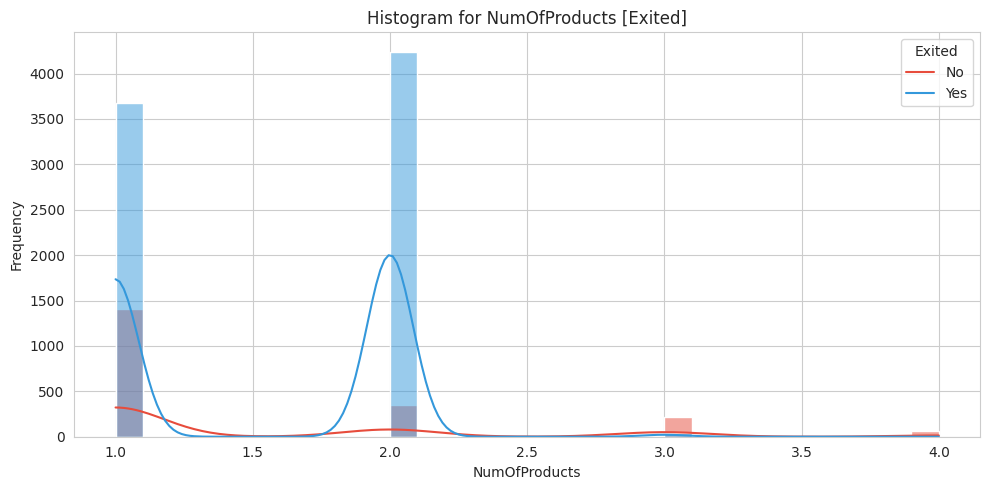

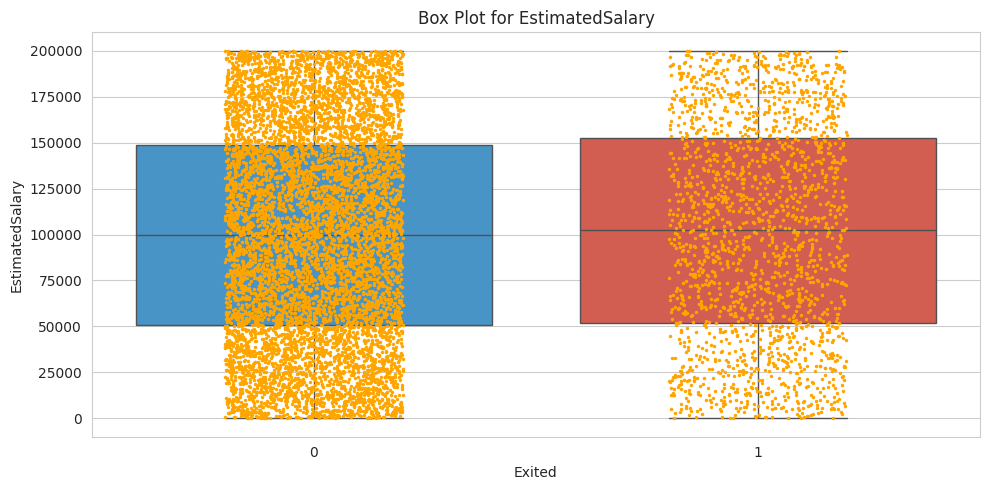

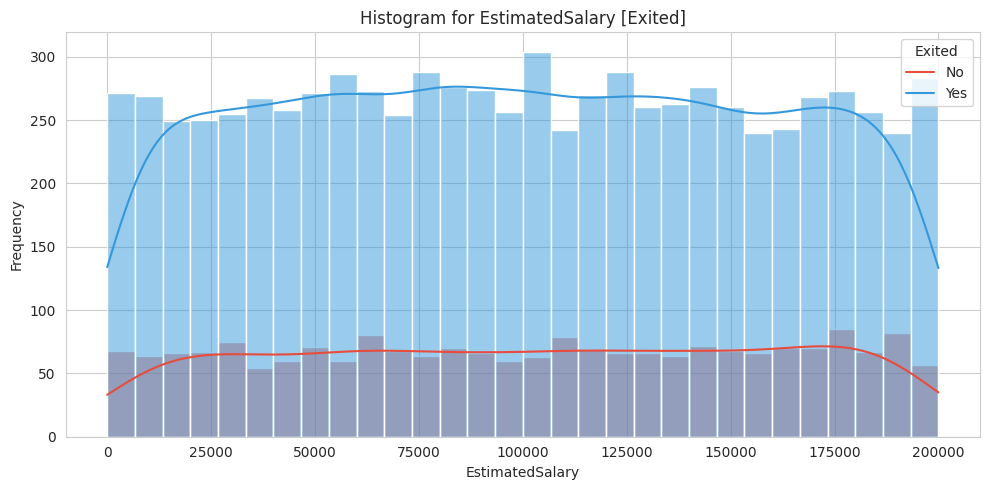

In [8]:
# List of numerical variables
numerical_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Define a custom color palette
custom_palette = ['#3498db', '#e74c3c','#2ecc71']

# Concatenate the original data before splitting for analysis
original_data = pd.concat([X, y], axis=1)

# Improved function to create and display a box plot for a single variable
def create_boxplot(variable):
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(10, 5))

    # Box plot with jitter
    sns.boxplot(x=original_data['Exited'], y=original_data[variable], palette=custom_palette, ax=ax)
    sns.stripplot(x=original_data['Exited'], y=original_data[variable], color='orange', jitter=0.2, size=2.5, ax=ax)
    ax.set_title(f"Box Plot for {variable}")
    ax.set_xlabel("Exited")
    ax.set_ylabel(variable)

    plt.tight_layout()
    plt.show()

# Improved function to create and display a histogram for a single variable
def create_histogram(variable):
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(10, 5))

    sns.histplot(data=original_data, x=variable, hue='Exited', kde=True, bins=30, palette=custom_palette, ax=ax)
    ax.set_title(f"Histogram for {variable} [Exited]")
    ax.set_xlabel(variable)
    ax.set_ylabel("Frequency")
    plt.legend(title='Exited', labels=['No', 'Yes'])

    plt.tight_layout()
    plt.show()

# Perform univariate analysis for each numerical variable
for variable in numerical_variables:
    create_boxplot(variable)
    create_histogram(variable)


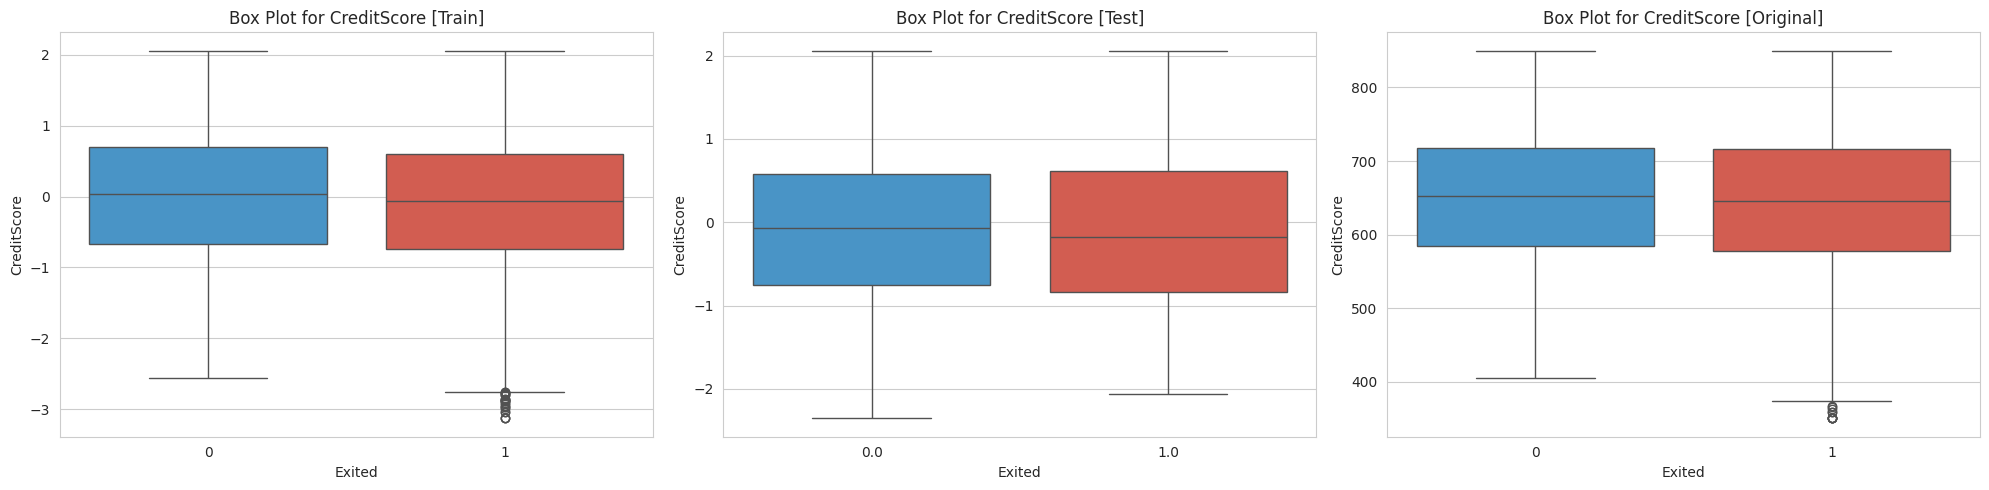

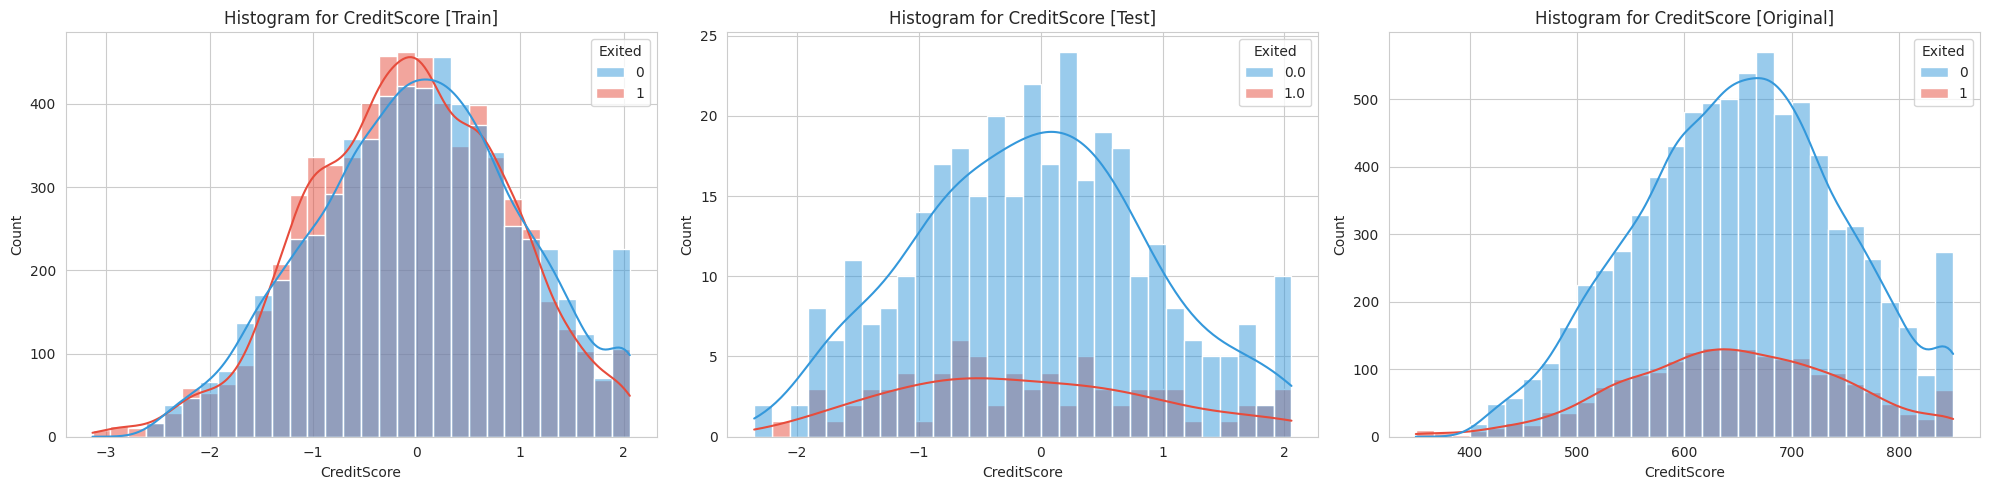

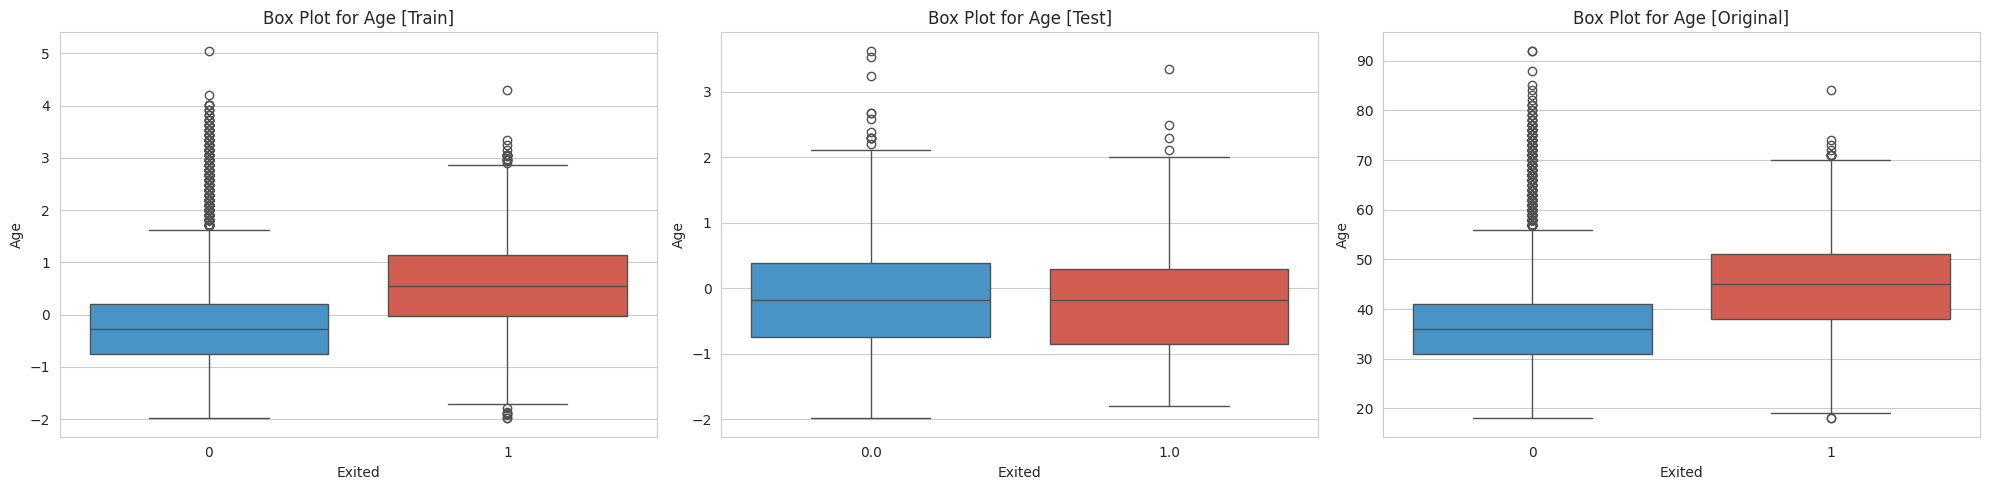

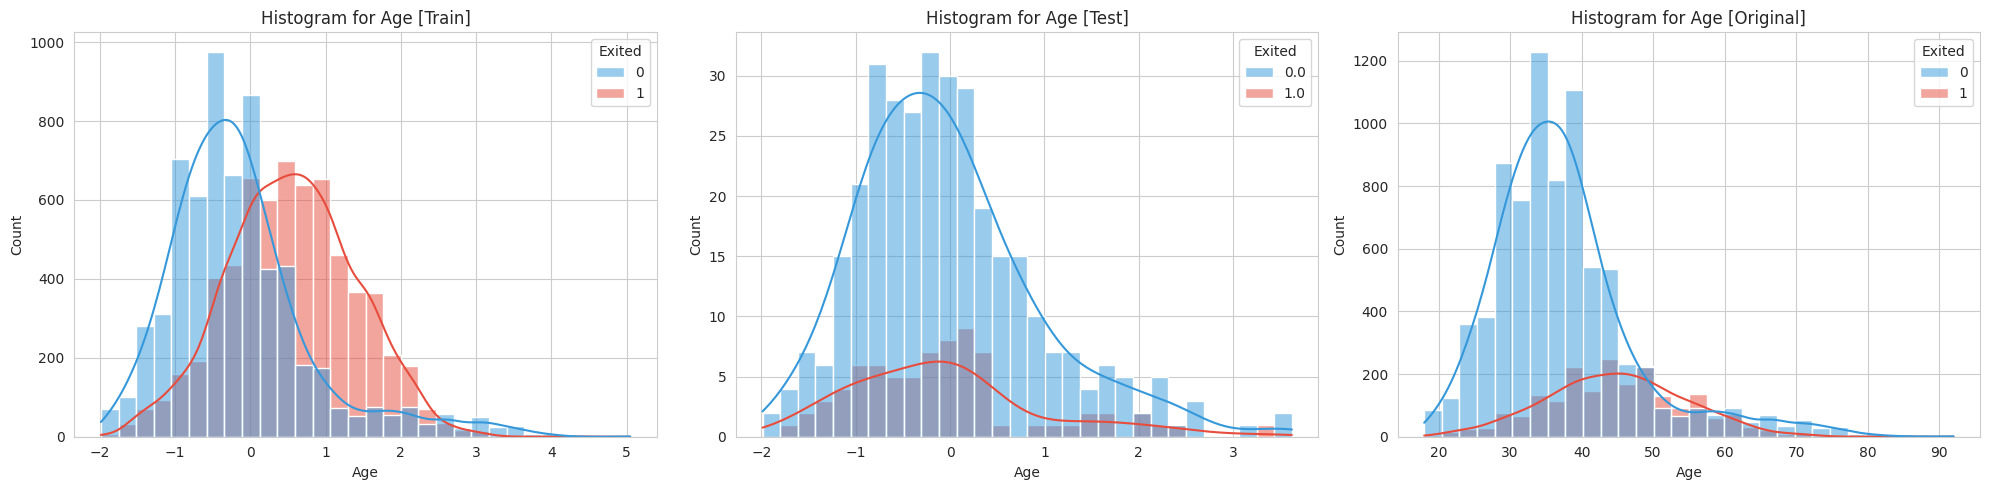

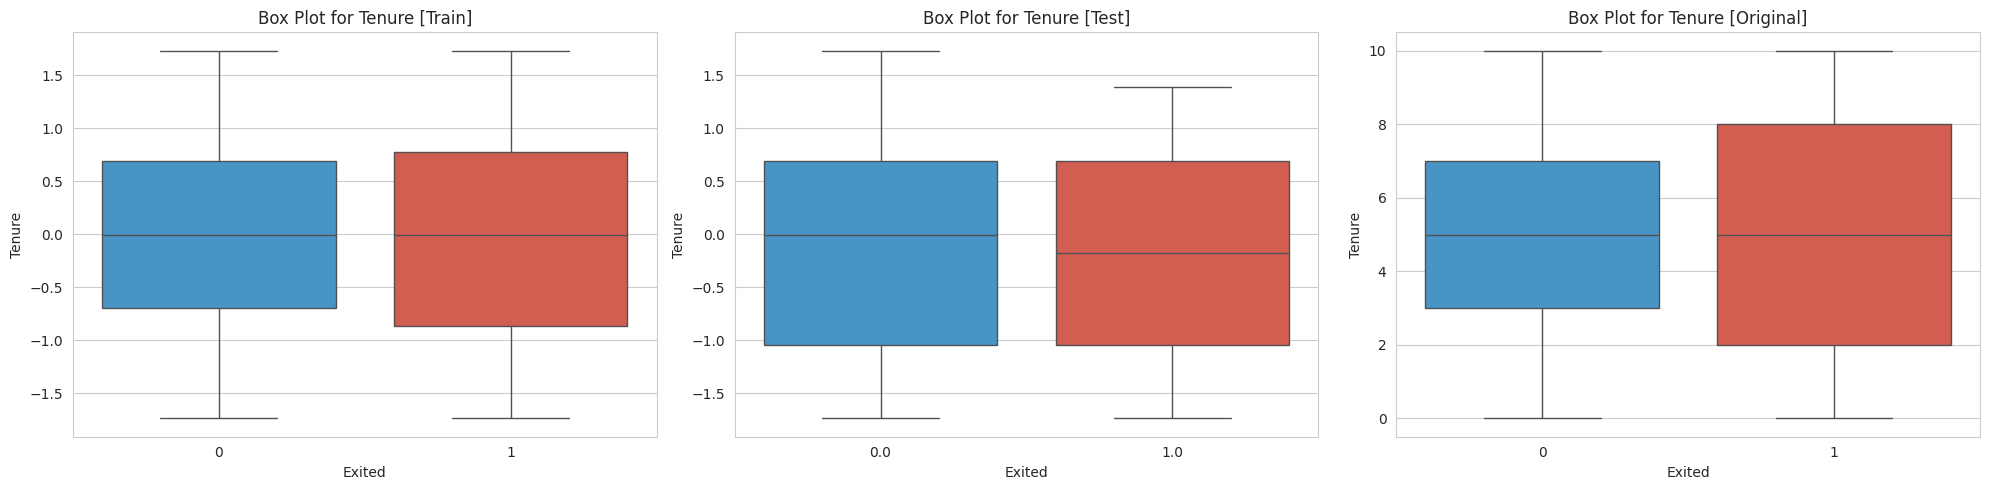

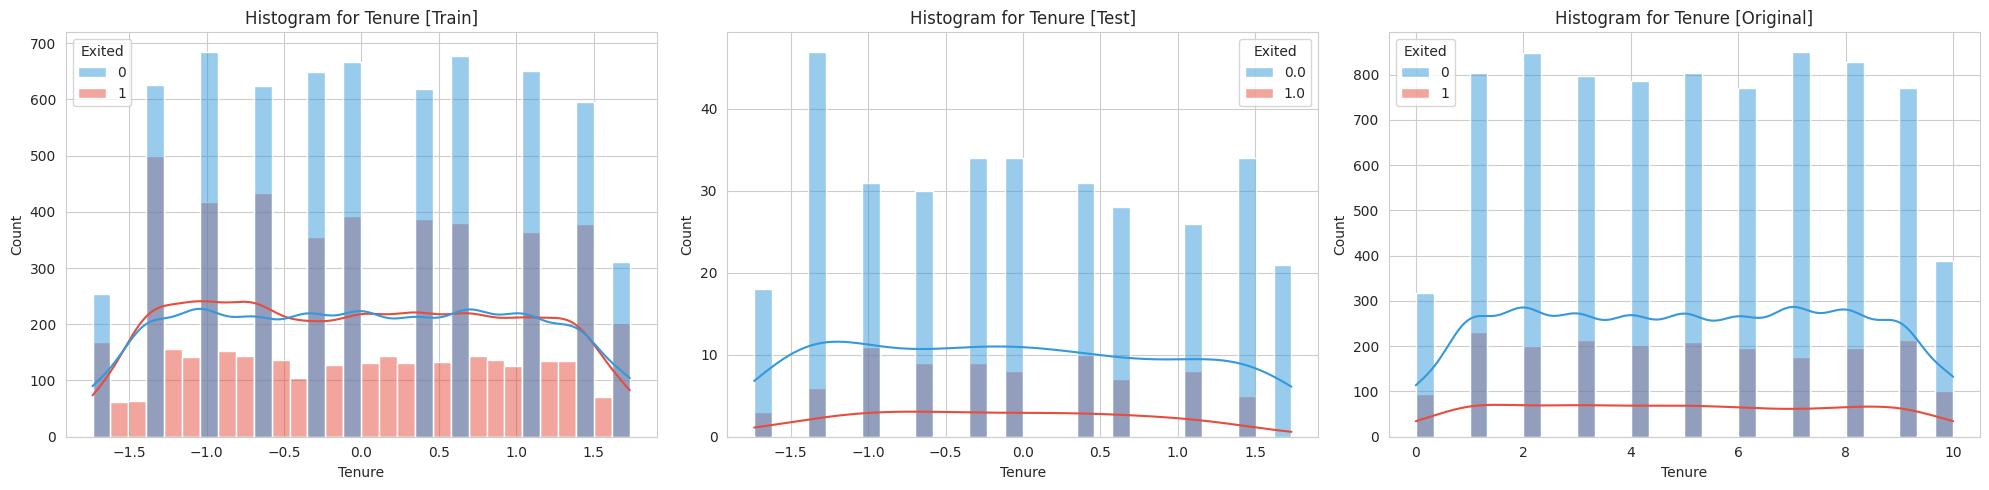

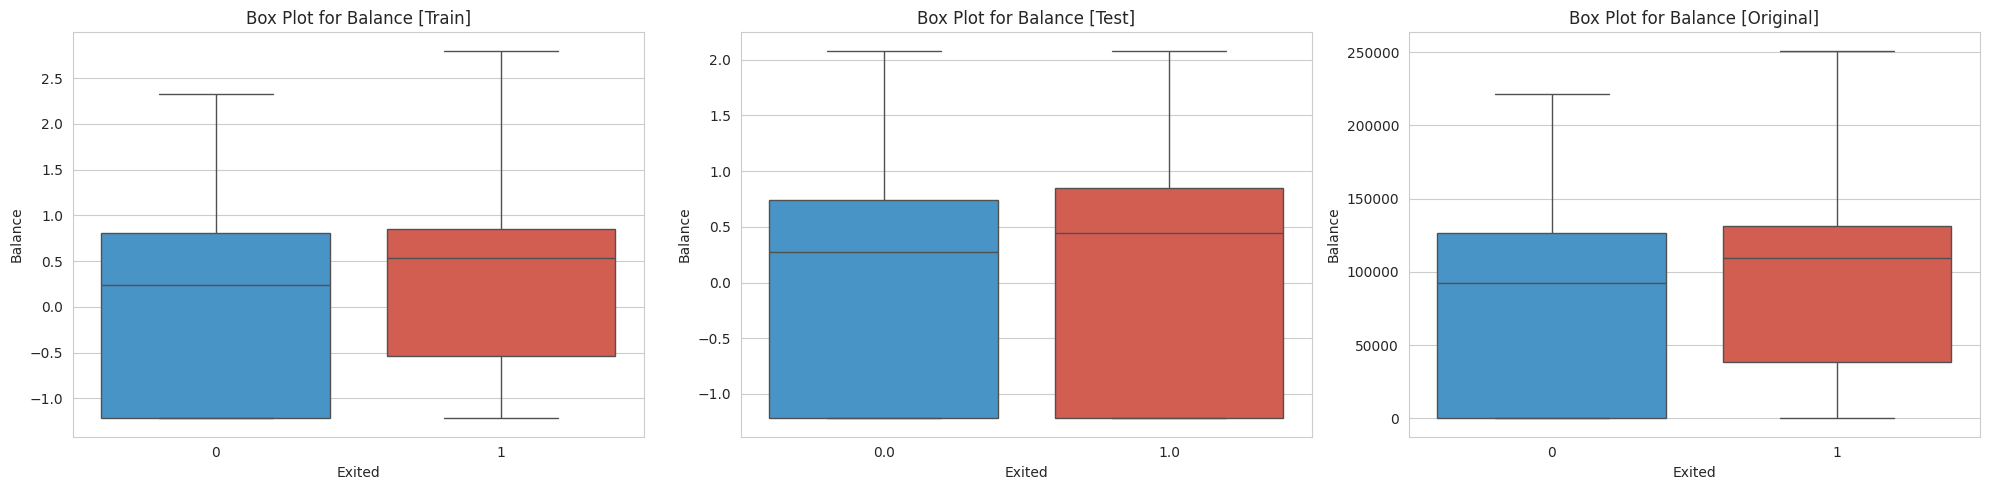

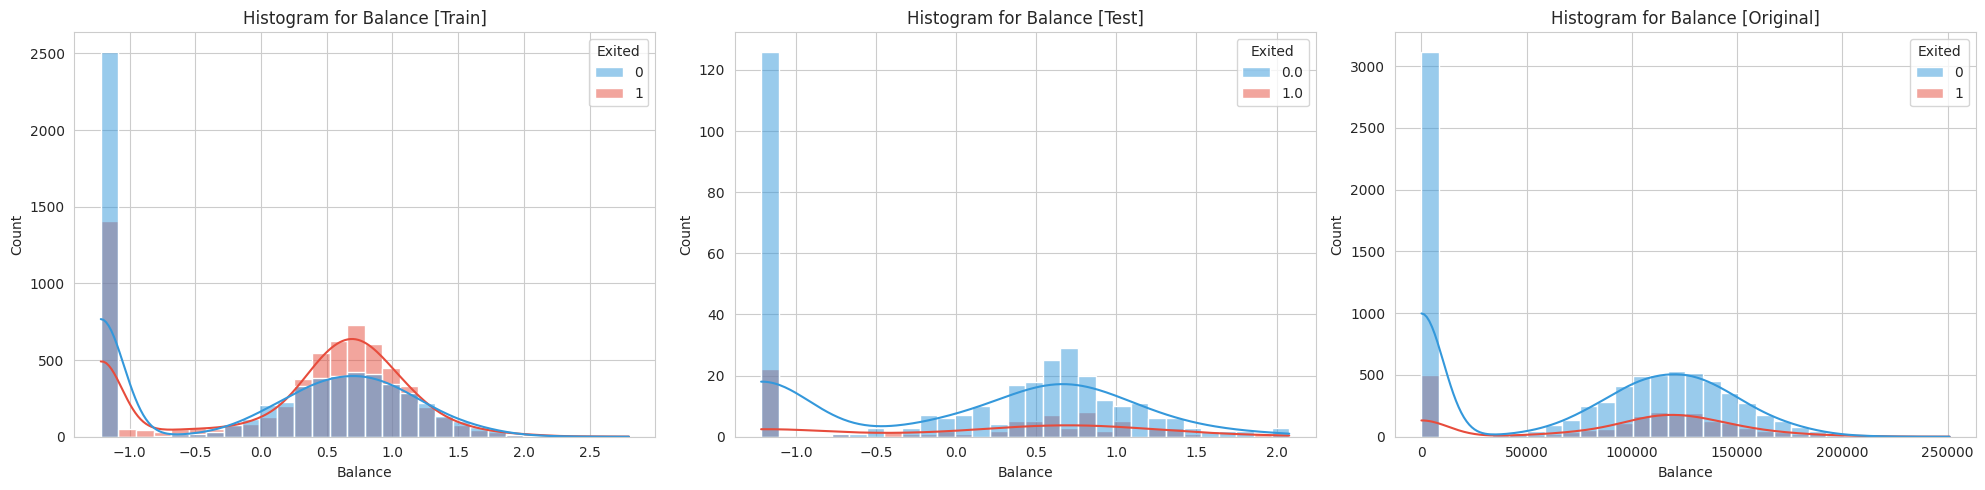

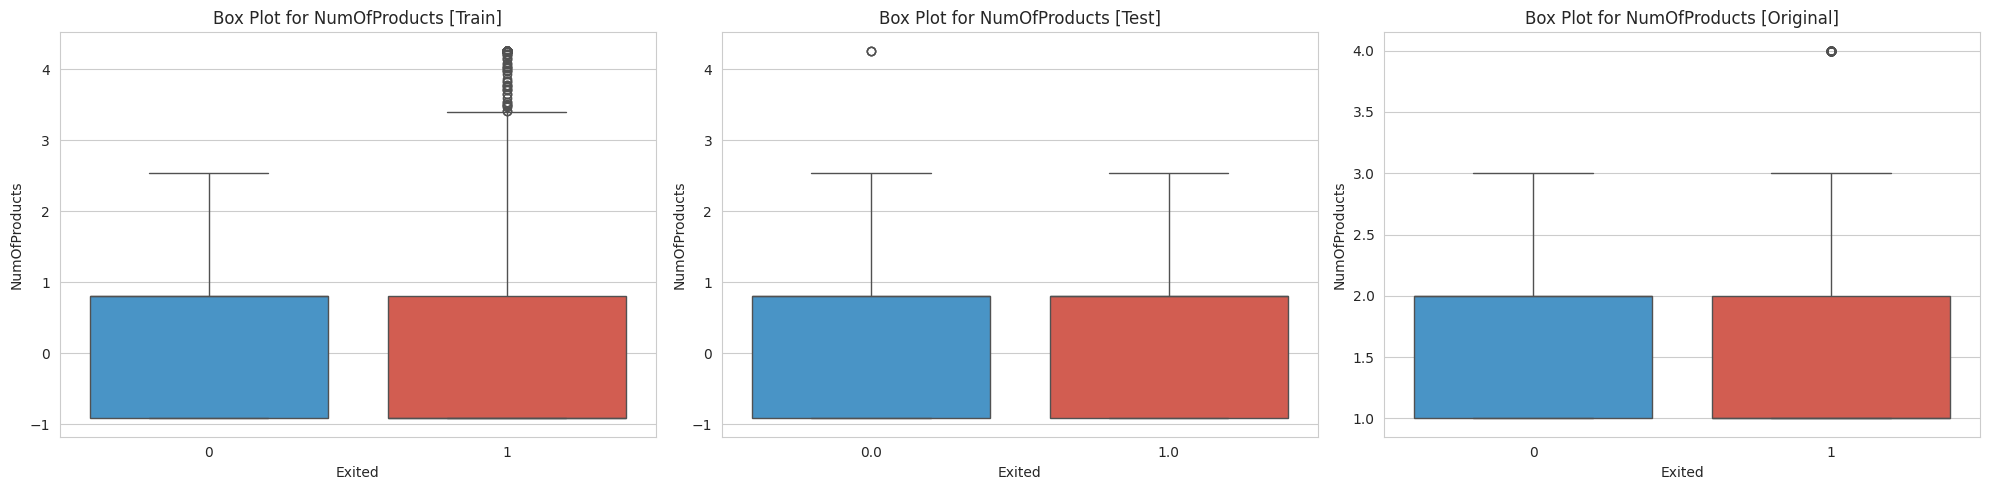

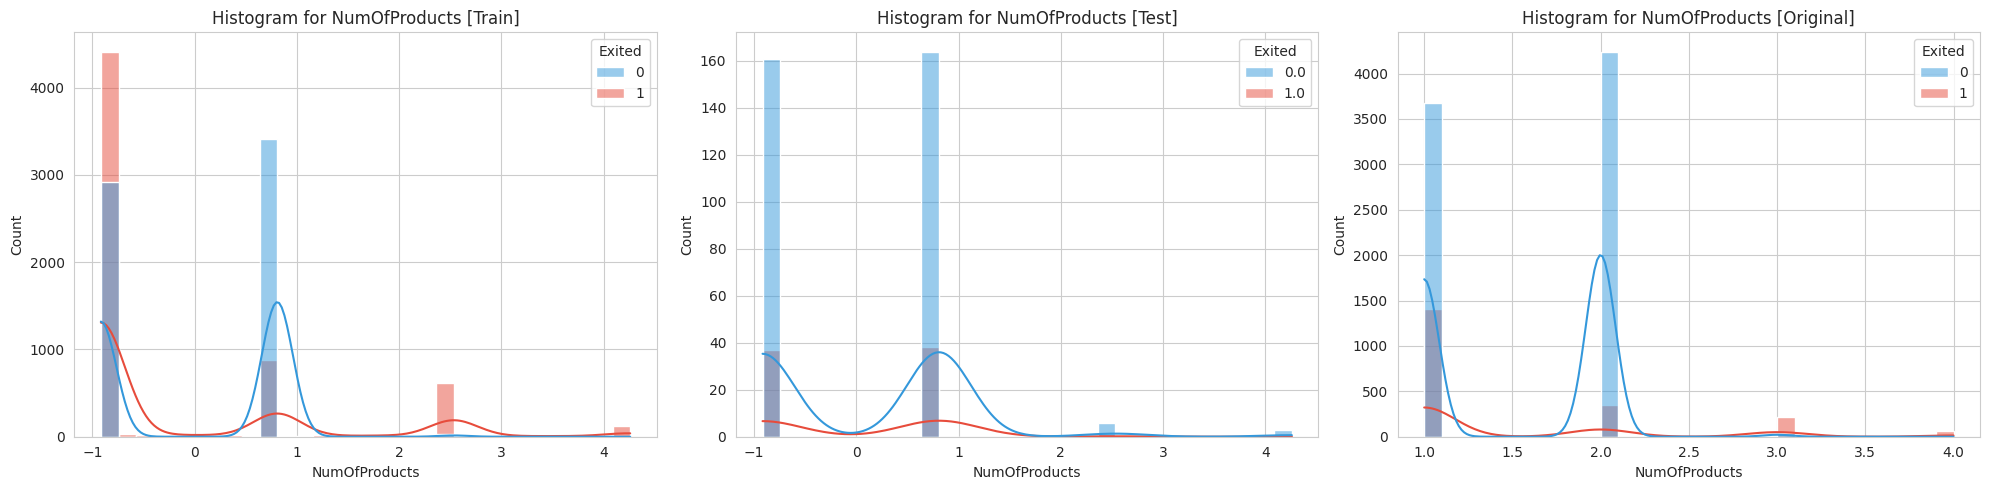

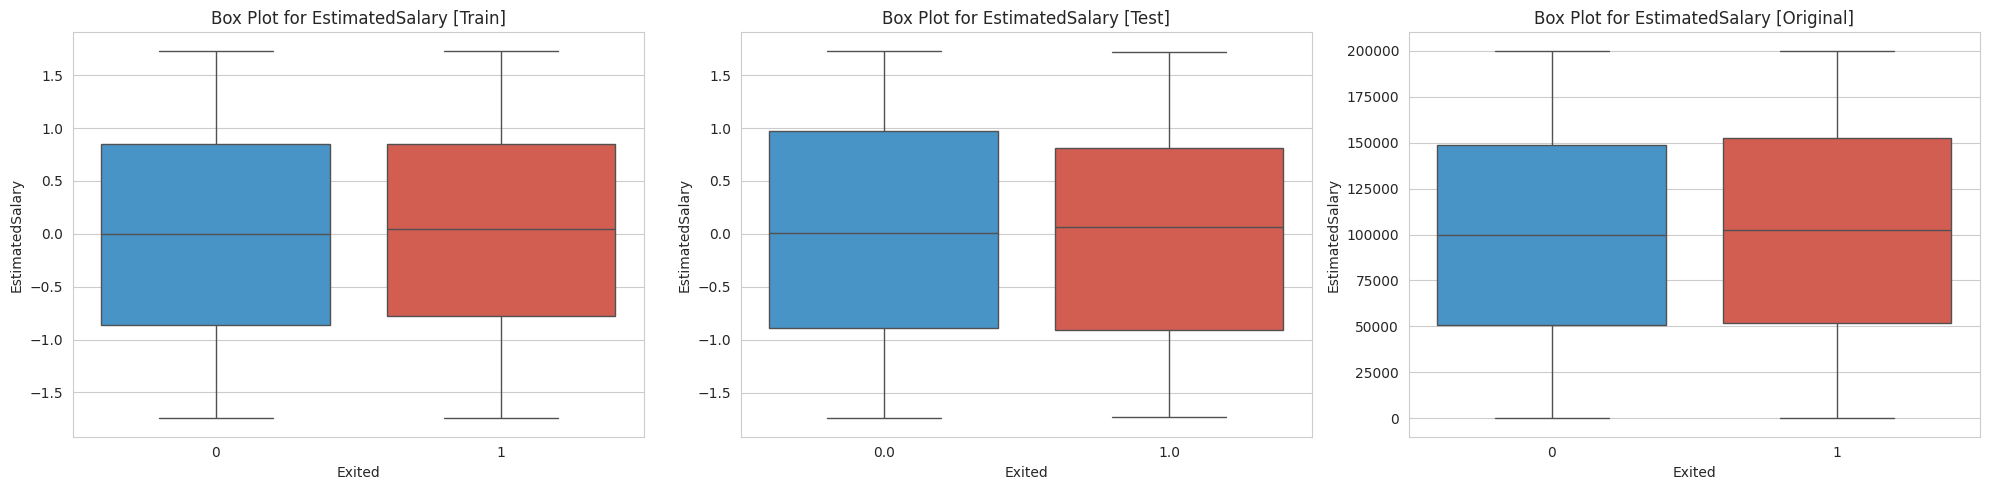

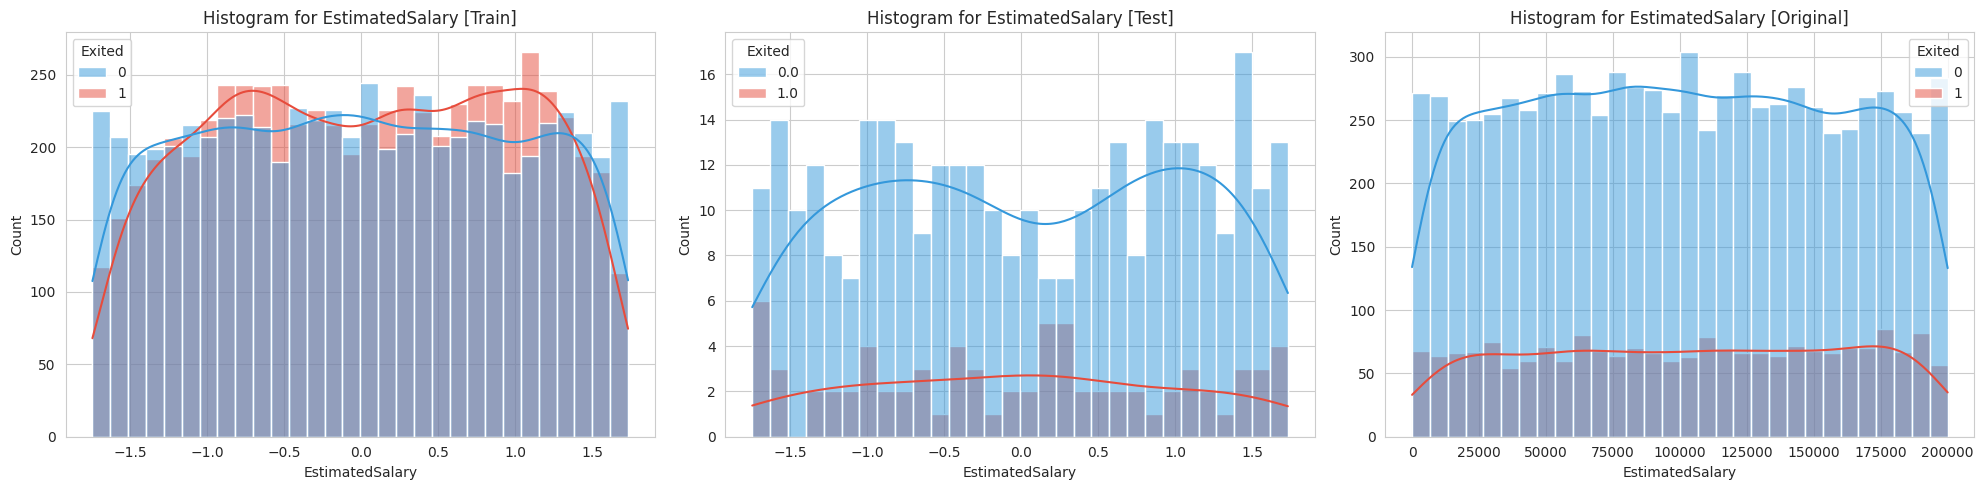

In [9]:
# Improved function to create and display box plots for train, test, and original data
def create_boxplot_all(variable):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # Box plots for train, test, and original data
    sns.boxplot(data=pd.concat([pd.DataFrame(X_train, columns=X.columns), y_train], axis=1), x='Exited', y=variable, ax=axes[0], palette=custom_palette)
    axes[0].set_title(f"Box Plot for {variable} [Train]")

    sns.boxplot(data=pd.concat([pd.DataFrame(X_test, columns=X.columns), y_test], axis=1), x='Exited', y=variable, ax=axes[1], palette=custom_palette)
    axes[1].set_title(f"Box Plot for {variable} [Test]")

    sns.boxplot(data=original_data, x='Exited', y=variable, ax=axes[2], palette=custom_palette)
    axes[2].set_title(f"Box Plot for {variable} [Original]")

    plt.tight_layout()
    plt.show()

# Improved function to create and display histograms for train, test, and original data
def create_histogram_all(variable):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # Histograms for train, test, and original data
    sns.histplot(data=pd.concat([pd.DataFrame(X_train, columns=X.columns), y_train], axis=1), x=variable, hue='Exited', kde=True, bins=30, ax=axes[0], palette=custom_palette)
    axes[0].set_title(f"Histogram for {variable} [Train]")

    sns.histplot(data=pd.concat([pd.DataFrame(X_test, columns=X.columns), y_test], axis=1), x=variable, hue='Exited', kde=True, bins=30, ax=axes[1], palette=custom_palette)
    axes[1].set_title(f"Histogram for {variable} [Test]")

    sns.histplot(data=original_data, x=variable, hue='Exited', kde=True, bins=30, ax=axes[2], palette=custom_palette)
    axes[2].set_title(f"Histogram for {variable} [Original]")

    plt.tight_layout()
    plt.show()

# Perform univariate analysis for each numerical variable
for variable in numerical_variables:
    create_boxplot_all(variable)
    create_histogram_all(variable)


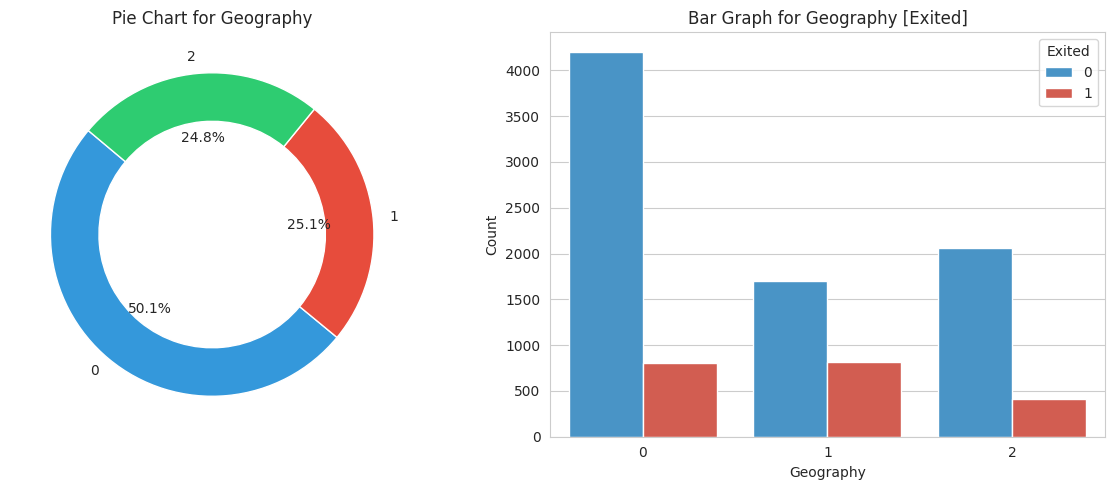

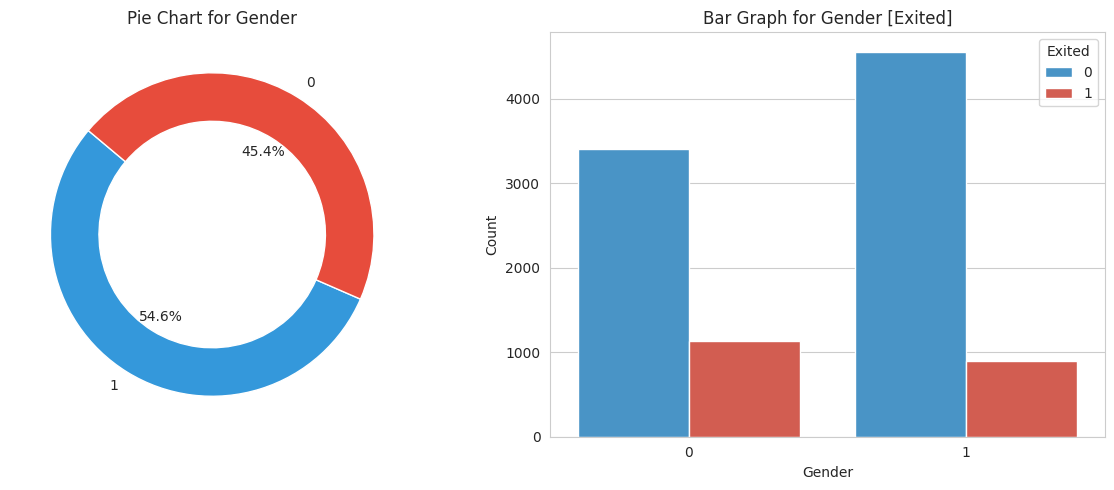

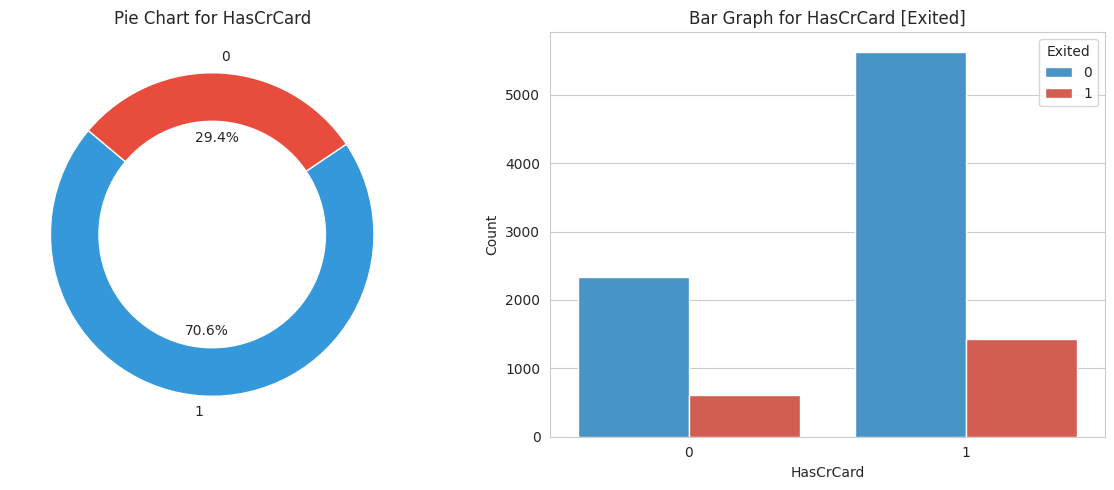

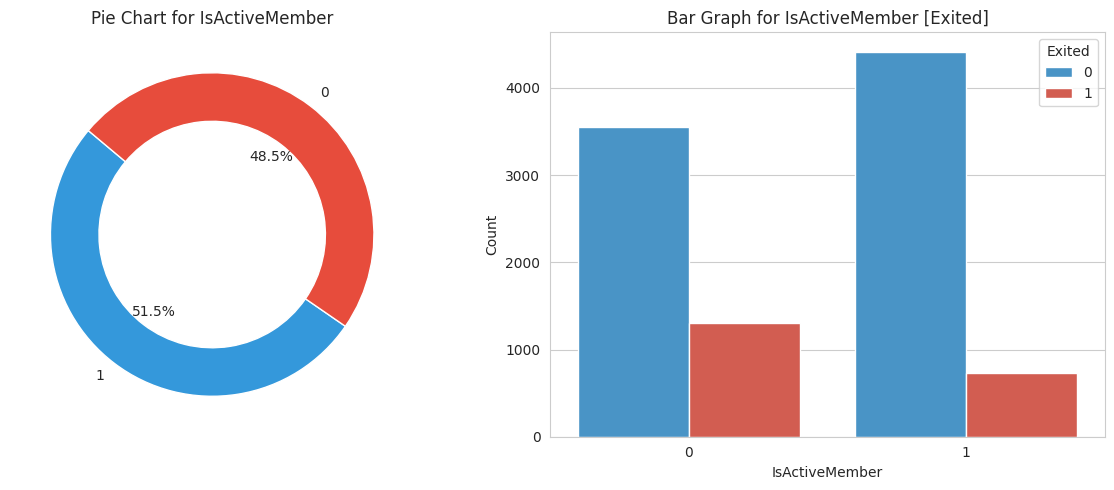

In [10]:
# Define a custom color palette for categorical features
categorical_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#bdc3c7', '#1abc9c', '#f1c40f', '#95a5a6', '#d35400']

# List of categorical variables
categorical_variables = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Improved function to create and display a pie chart and bar graph for a single categorical variable
def create_categorical_plots(variable):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Pie Chart
    original_data[variable].value_counts().plot.pie(autopct='%1.1f%%', colors=categorical_palette, wedgeprops=dict(width=0.3), startangle=140, ax=axes[0])
    axes[0].set_title(f"Pie Chart for {variable}")
    axes[0].set_ylabel('')

    # Bar Graph
    sns.countplot(data=original_data, x=variable, hue='Exited', palette=categorical_palette, ax=axes[1])
    axes[1].set_xlabel(variable)
    axes[1].set_ylabel("Count")
    axes[1].set_title(f"Bar Graph for {variable} [Exited]")

    plt.tight_layout()
    plt.show()

# Perform univariate analysis for each categorical variable
for variable in categorical_variables:
    create_categorical_plots(variable)


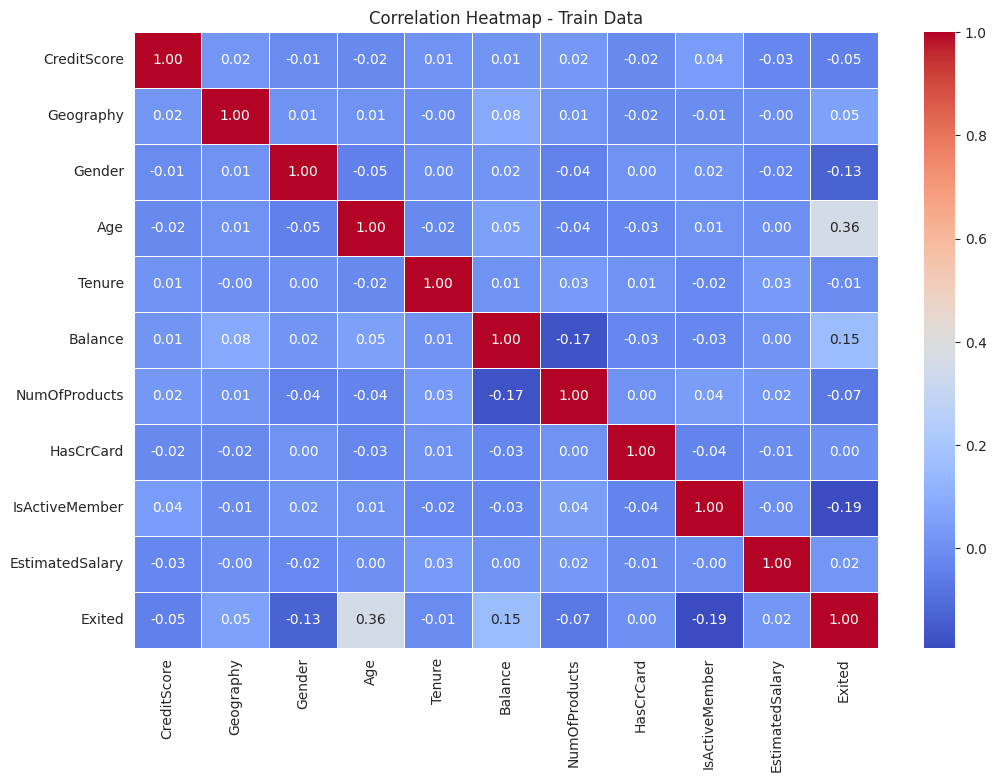

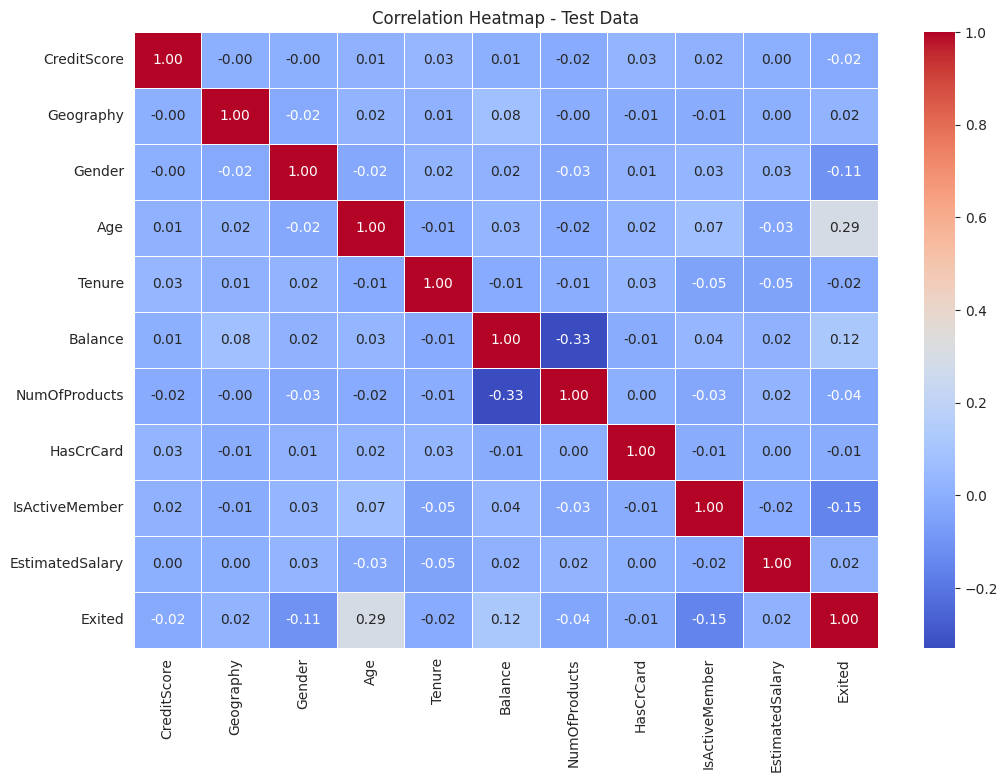

In [11]:
# Correlation Heatmap for Train Data
def plot_correlation_heatmap(data, title):
    corr = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Heatmap - {title}')
    plt.show()

# Create DataFrame for Train and Test data with target variable included
train_data = pd.concat([pd.DataFrame(X_train, columns=X.columns), y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([pd.DataFrame(X_test, columns=X.columns), y_test.reset_index(drop=True)], axis=1)

# Plot Correlation Heatmap for Train Data
plot_correlation_heatmap(train_data, 'Train Data')

# Plot Correlation Heatmap for Test Data
plot_correlation_heatmap(test_data, 'Test Data')
